# 1 - Perkenalan

Nama      : Muhamamd Aji Satrio Wiyogo

Batch     : FTDS - RMT - 20

Objective : Analisis ini berguna untuk menghasilkan strategi pemasaran yang baik bagi bank dengan memahami profil pengguna kartu kredit yang berbeda. Dengan menerapkan algoritma K-Means untuk membuat cluster segmentasi, bank dapat mengidentifikasi kelompok pelanggan yang serupa berdasarkan pola penggunaan kartu kredit mereka.


# 2 - Query 

In [2]:
'''
SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_020_rmt.credit-card-information`
'''

'\nSELECT * FROM `ftds-hacktiv8-project.phase1_ftds_020_rmt.credit-card-information`\n'

# 3 - Import Libraries

In [3]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_classification
import missingno as msno
%matplotlib inline
import numpy as np
from scipy.stats import mode
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
import json
import pickle

# 4 - Data Loading

In [6]:
data = pd.read_csv('h8dsft_P1G4_muhammad_aji_satrio_w.csv')
warnings.filterwarnings('ignore')

## Information

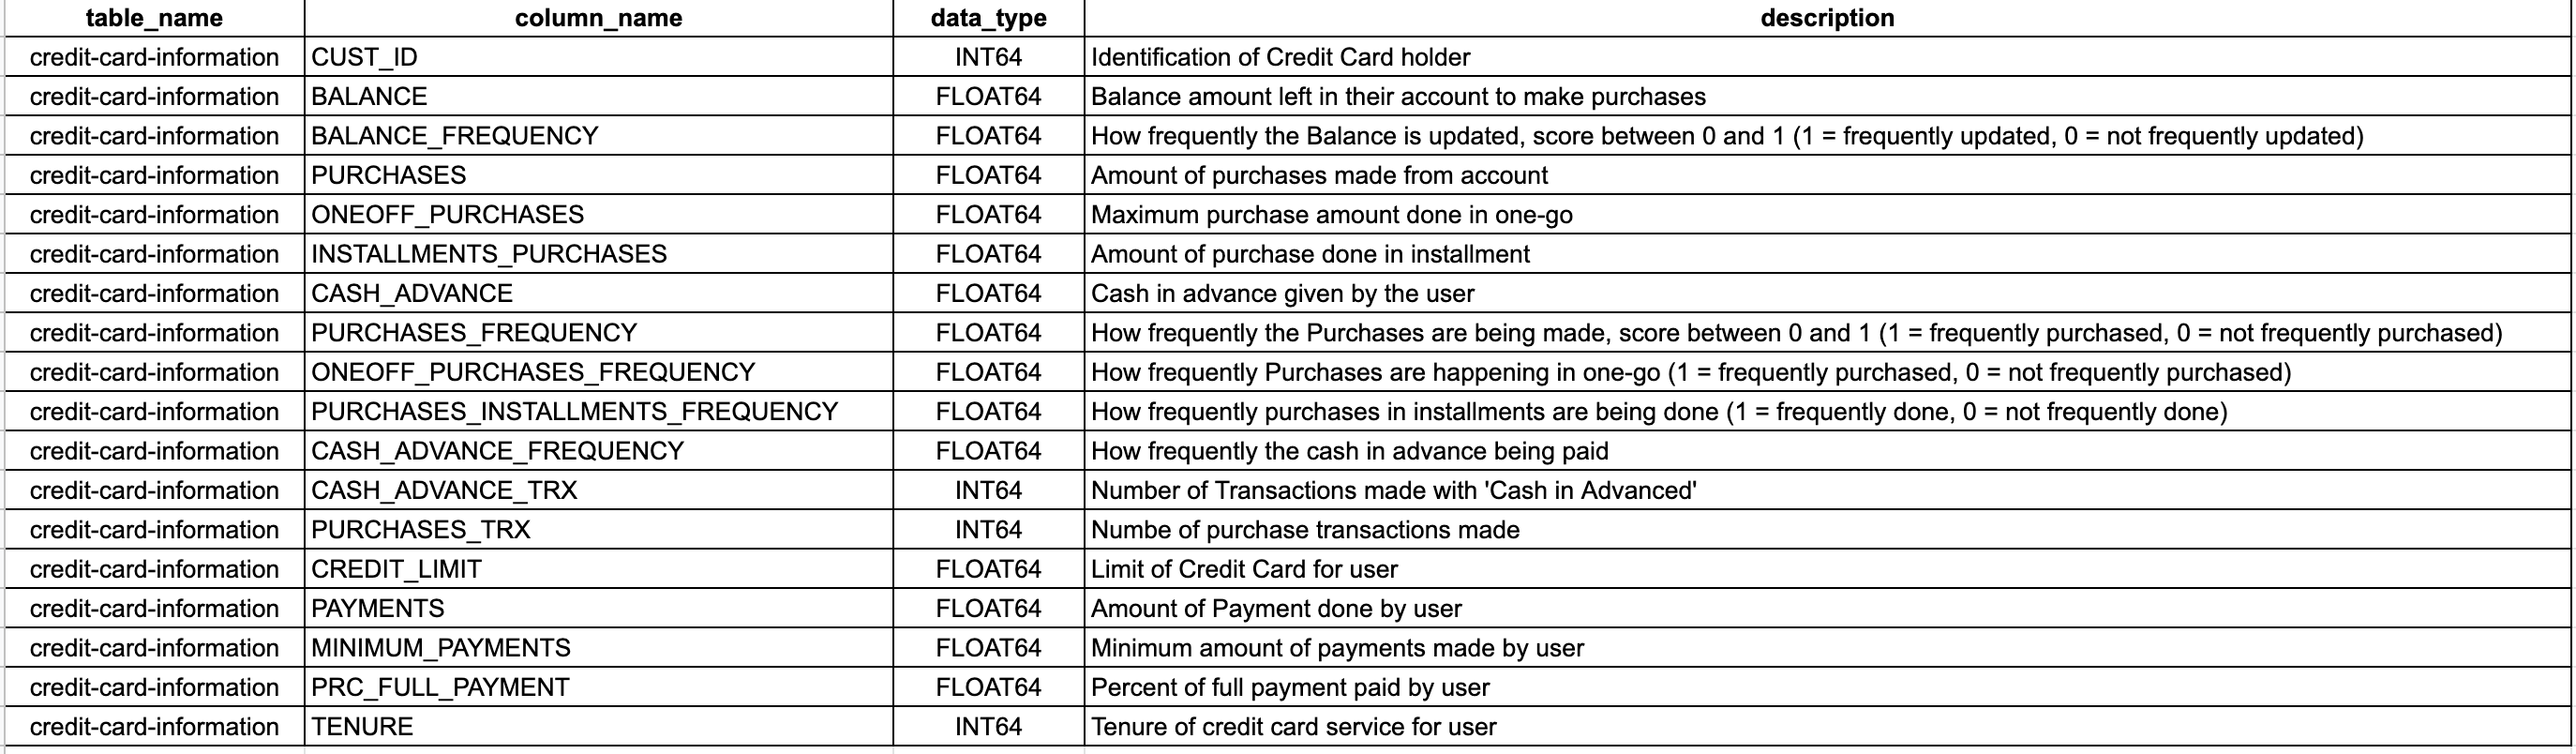

In [7]:
#showing head
data.head(10).style.background_gradient(cmap='PuBu').hide_index()

CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
788,16.581535,0.125000,200.000000,0.000000,200.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.000000,0.000000,nan,0.000000,8
1902,943.584041,0.875000,103.000000,103.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.000000,215.325023,410.484825,0.000000,8
2322,1.979916,0.125000,80.000000,80.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.000000,0.000000,nan,0.000000,8
3091,3.833185,0.125000,45.000000,45.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,500.000000,0.000000,nan,0.000000,8
3426,461.455720,1.000000,585.000000,585.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.000000,258.032630,151.696433,0.000000,8
3976,1053.594730,1.000000,1450.000000,1450.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.000000,397.090516,227.143184,0.000000,8
4266,2237.238086,1.000000,120.000000,120.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.000000,343.102984,712.986387,0.000000,8
4360,2730.843802,1.000000,2900.000000,2900.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2900.000000,0.000000,nan,0.000000,8
4680,424.994385,0.375000,1200.000000,1200.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.000000,57.266292,56.720210,0.000000,8
5069,0.000000,0.000000,176.030000,176.030000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,7000.000000,0.000000,nan,0.000000,8


In [8]:
#showing tail
data.tail(10).style.background_gradient(cmap='PuBu').hide_index()

CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2345,9629.808851,1.000000,0.000000,0.000000,0.000000,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.000000,2468.988022,2134.295731,0.000000,11
4630,1079.008102,1.000000,0.000000,0.000000,0.000000,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.000000,1379.635287,271.364415,0.090909,11
6785,1040.030221,1.000000,0.000000,0.000000,0.000000,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.000000,290.129620,287.994171,0.000000,11
7347,1322.818587,1.000000,0.000000,0.000000,0.000000,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.000000,1035.627320,312.835530,0.000000,11
8447,1060.391273,1.000000,0.000000,0.000000,0.000000,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.000000,407.360560,277.084736,0.000000,11
8614,809.582978,0.909091,0.000000,0.000000,0.000000,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.000000,4372.148648,241.645387,0.090909,11
4296,3386.490883,1.000000,560.980000,427.220000,133.760000,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.000000,1039.000037,886.050237,0.000000,11
1995,3447.674222,1.000000,205.000000,205.000000,0.000000,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.000000,665.239171,817.844662,0.000000,11
4476,4840.545574,1.000000,1595.930000,1595.930000,0.000000,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.000000,905.844846,2376.919568,0.090909,11
3564,1977.007090,1.000000,1032.040000,226.900000,805.140000,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.000000,3056.424974,910.707525,0.090909,11


In [9]:
#copy data
new_data = data.copy()

In [10]:
#info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
#describe data
data.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,4475.500000,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2583.786788,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2238.250000,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,4475.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,6712.750000,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# 5- Exploratory Data Analysis ( EDA )

In [12]:
#membuat scater plot
def scatter_plot ( n , m , b , data) : 
    sampled_data = data.sample(n=400, random_state=13)  # Adjust the value of n and random_state as desired
    sns.scatterplot(data=sampled_data, x=n , y= m, hue=b, palette='PuBu')
    sns.regplot(data=sampled_data, x=n, y= m , scatter=False)
    plt.xlabel(n)
    plt.ylabel(m)
    plt.title(f"Scatter Plot of {n} vs. {m}")
    plt.legend()
    plt.show()


<Axes: ylabel='TENURE'>

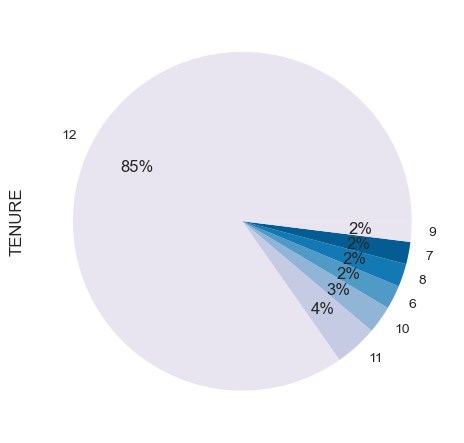

In [13]:
#plotting
colors = sns.color_palette('PuBu')
new_data.TENURE.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1, colors=colors )

Disini terlihat ternyata kebanyakan customer memiliki Tenure selama 12 bulan

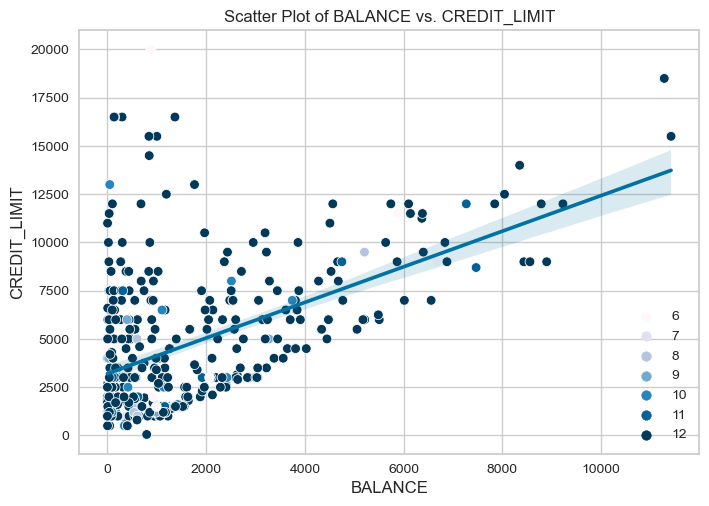

In [14]:
scatter_plot ( 'BALANCE', 'CREDIT_LIMIT', 'TENURE', new_data)

Disini terlihat semakin tinggi balance customer cenderung memiliki credit limit yang tinggi juga

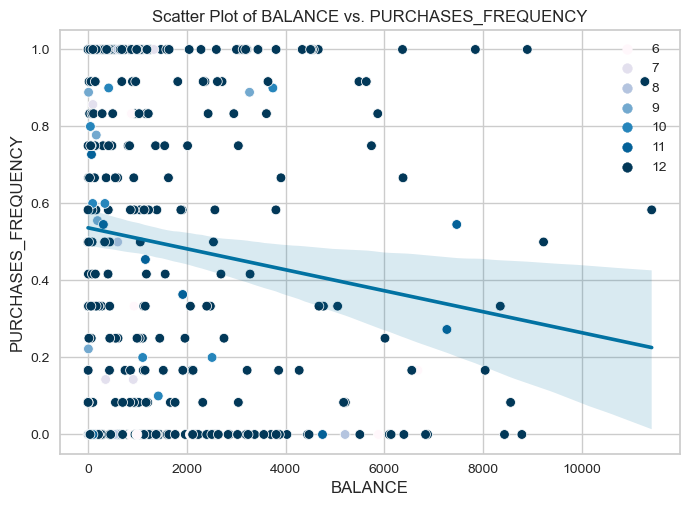

In [15]:
scatter_plot ( 'BALANCE', 'PURCHASES_FREQUENCY', 'TENURE', new_data)

Dari plot ini semakin tinggi balance customer cenderung frekuensi pembeliannya menurun

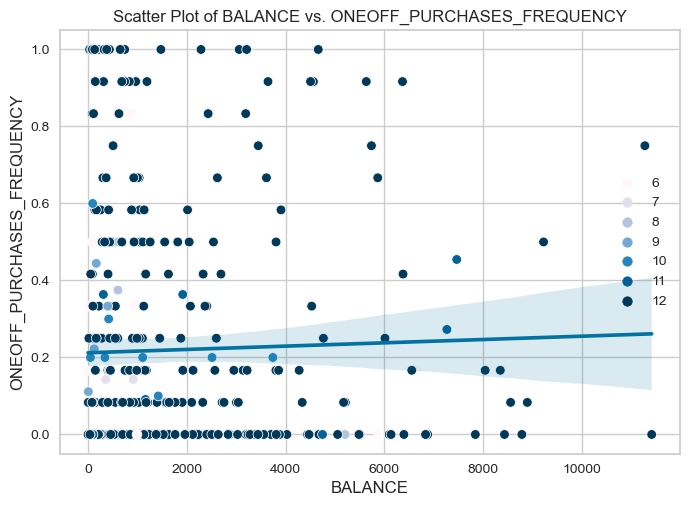

In [16]:
scatter_plot ( 'BALANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'TENURE', new_data)

sepertinya tidak ada korelasi antara balance dengan pembelian jumlah besar 

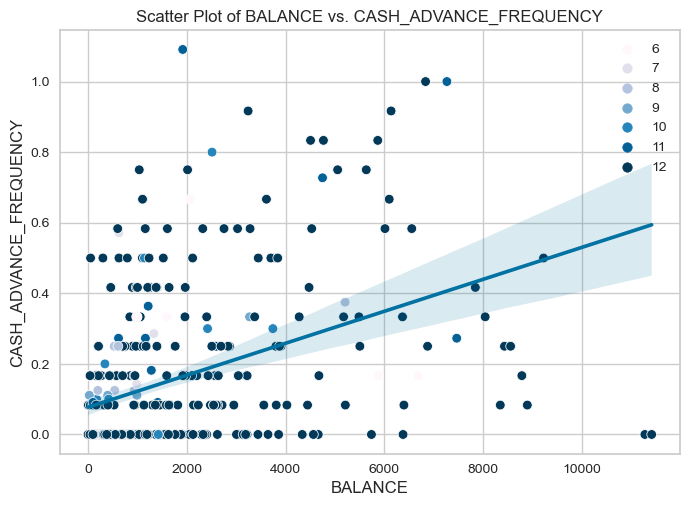

In [17]:
scatter_plot ( 'BALANCE', 'CASH_ADVANCE_FREQUENCY', 'TENURE', new_data)

Disini terlihat customer yang balancenya tinggi cenderung untuk membayar secara cash

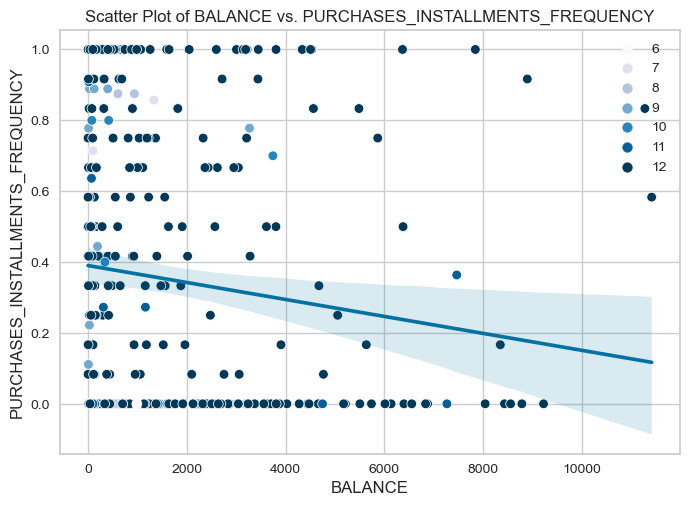

In [18]:
scatter_plot ( 'BALANCE', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'TENURE', new_data)

Disini terlihat customer yang tinggi cenderung untuk tidak membayar secara menyicil, dan juga sebalikny

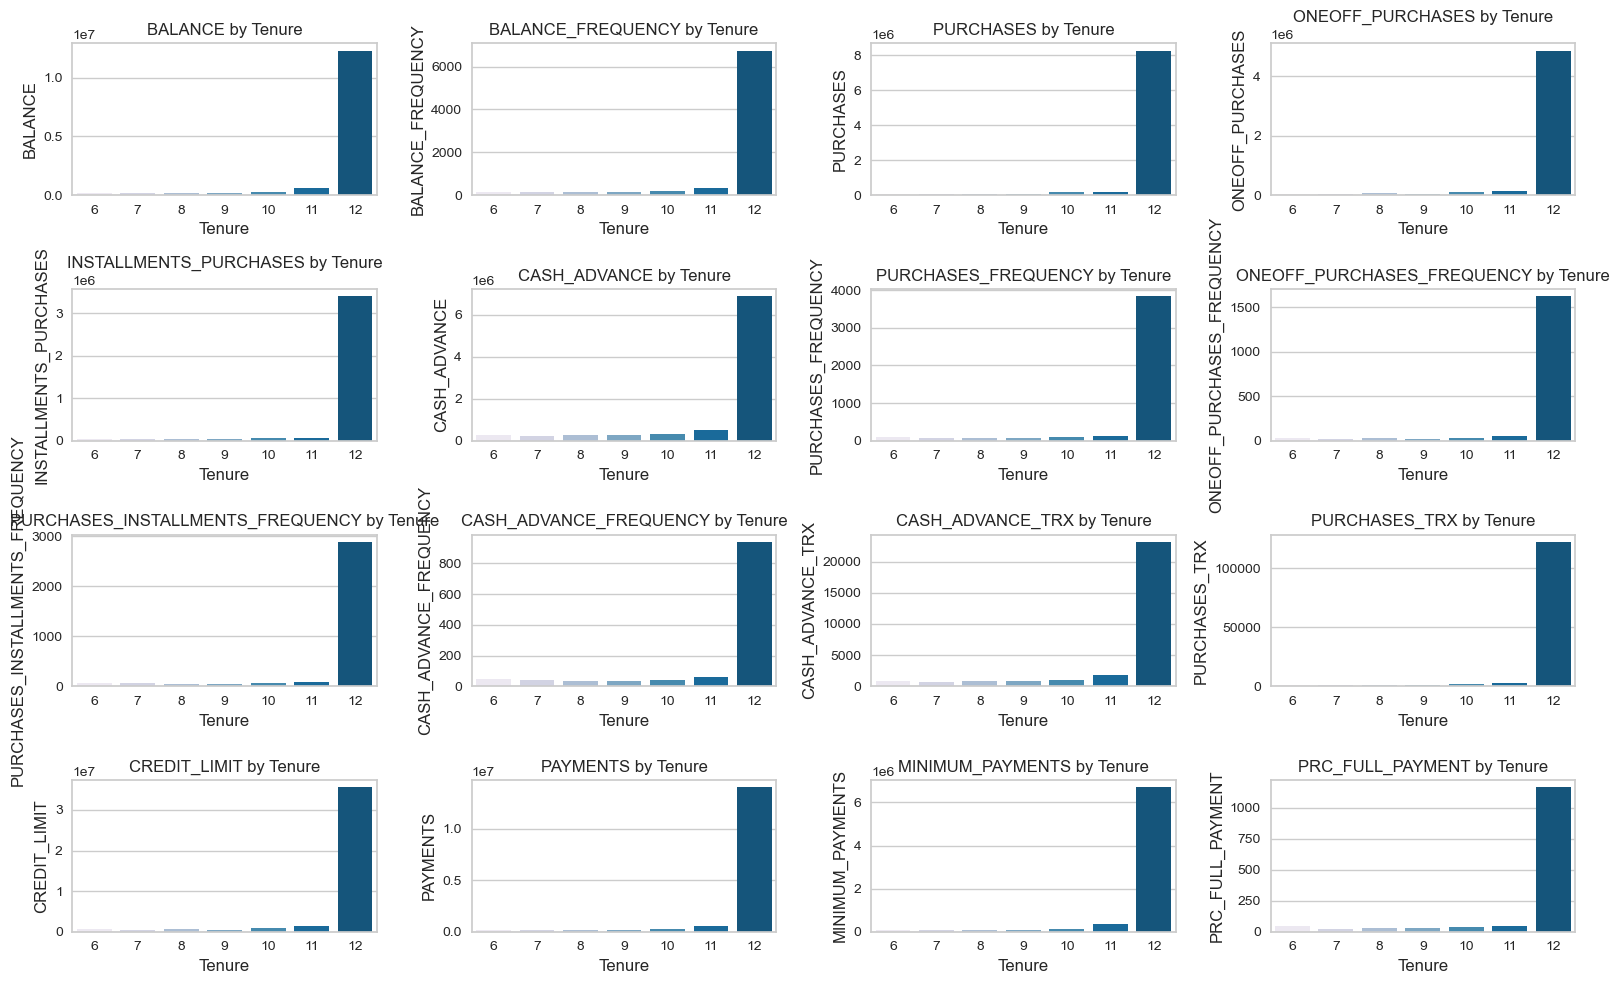

In [19]:
columns = [col for col in new_data.columns if col not in ['CUST_ID', 'TENURE']]
num_plots = len(columns)

fig, axes = plt.subplots(4, 4, figsize=(16, 10))

for i, col in enumerate(columns):
    ax = axes[i // 4, i % 4]  # Calculate subplot position based on row and column indices
    grouped_data = new_data.groupby('TENURE')[col].sum().reset_index()
    sns.barplot(data=grouped_data, x='TENURE', y=col, ax=ax,palette='PuBu')
    ax.set_xlabel('Tenure')
    ax.set_ylabel(col)
    ax.set_title(f'{col} by Tenure')

plt.tight_layout()
plt.show()

Grafik sulit untuk dianalisis lebih jauh, namun kurang lebih secara overall customer mempunyai tenure 12

#  6- Feature Engineering

Karena tujuan pada analisis ini membuat clustering pada data, maka tidak diperlukan pemisahan antara feature dan target. Untuk feature pada CUST ID bisa kita drop karena tidak penting dalam analisis

Step selanjutnya memisahkan antara feature kategorical dan feature numerical pada data. 

## Splitting Categorical dan Numerical

In [20]:
#dropping col
new_data_1 = new_data.drop('CUST_ID',axis=1)

In [21]:
#spliting num dan categorical
num_features = [col for col in new_data_1.columns if col != 'TENURE']
cat_features = ['TENURE']

In [22]:
#defining variable num n cat
data_num = new_data_1[num_features]
data_cat = new_data_1[cat_features]

## Handle Outlier

Karena pada analisis kali ini digunakan algoritma K-MEANS, maka perlu dilakukan pembersihan outliers pada data karena K-MEANS sangat rentan terhadap nilai outliers yang ada.

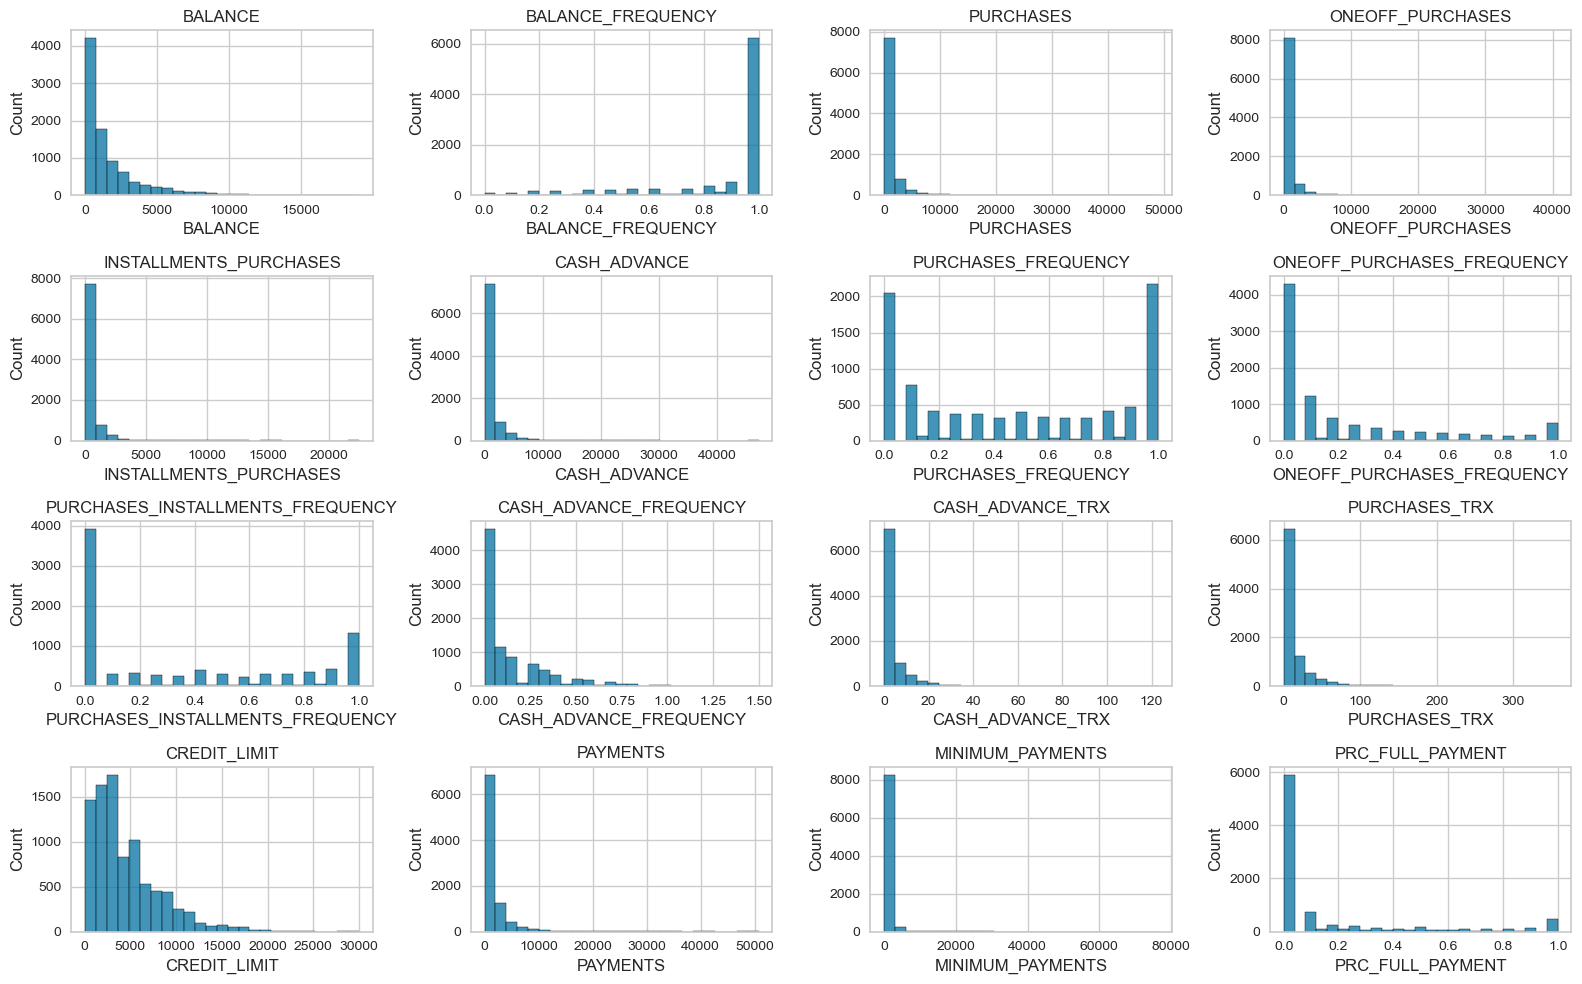

In [23]:
#menampilkan distribusi data pada feature
fig, axes = plt.subplots(4, 4, figsize=(16, 10))

for i, col in enumerate(num_features):
    row_idx = i // 4 
    col_idx = i % 4 
    sns.histplot(data=data_num[col], bins=25, ax=axes[row_idx, col_idx]) 
    axes[row_idx, col_idx].set_title(col)  

plt.tight_layout()
plt.show()


Terlihat senya feature yang ada memiliki data distribusi yang tidak normal keseluruhan

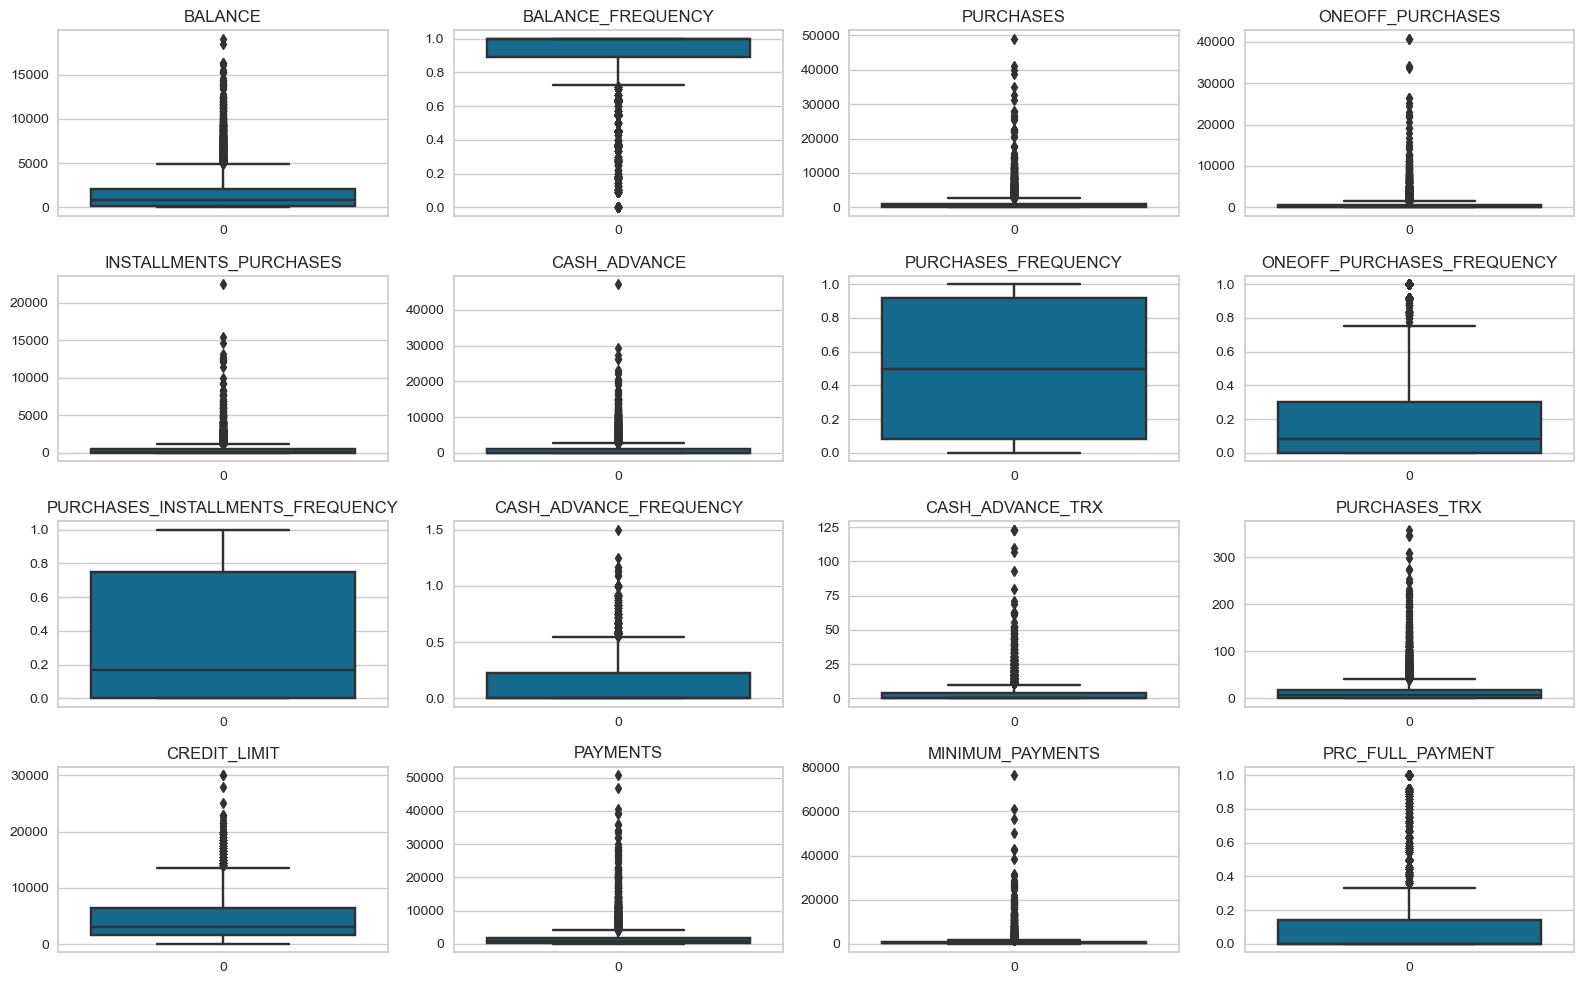

In [24]:
#plotting boxplot
fig, axes = plt.subplots(4, 4, figsize=(16, 10))

for i, col in enumerate(num_features):
    row_idx = i // 4 
    col_idx = i % 4 
    sns.boxplot(data=data_num[col], ax=axes[row_idx, col_idx]) 
    axes[row_idx, col_idx].set_title(col)  

plt.tight_layout()
plt.show()

Karena secara keseluruhan distribusi data tidak normal, maka dilakukan checking dengan menggunakan IQR

In [25]:
#defining function
def skew_data (df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [26]:
#cheecking total outlier pada tiap feature
for col in num_features:
    upper_boundary, lower_boundary = skew_data(data_num, col, 1.5)
    print('Total data: {}'.format(len(data_num)))
    num_outliers = len(data_num[data_num[col] > upper_boundary])
    print('Num Outliers {}: {}'.format(col, num_outliers))
    print('% Total Outliers of {}: {:.2f}%'.format(col, (num_outliers / len(data_num)) * 100))
    print('')


Total data: 8950
Num Outliers BALANCE: 695
% Total Outliers of BALANCE: 7.77%

Total data: 8950
Num Outliers BALANCE_FREQUENCY: 0
% Total Outliers of BALANCE_FREQUENCY: 0.00%

Total data: 8950
Num Outliers PURCHASES: 808
% Total Outliers of PURCHASES: 9.03%

Total data: 8950
Num Outliers ONEOFF_PURCHASES: 1013
% Total Outliers of ONEOFF_PURCHASES: 11.32%

Total data: 8950
Num Outliers INSTALLMENTS_PURCHASES: 867
% Total Outliers of INSTALLMENTS_PURCHASES: 9.69%

Total data: 8950
Num Outliers CASH_ADVANCE: 1030
% Total Outliers of CASH_ADVANCE: 11.51%

Total data: 8950
Num Outliers PURCHASES_FREQUENCY: 0
% Total Outliers of PURCHASES_FREQUENCY: 0.00%

Total data: 8950
Num Outliers ONEOFF_PURCHASES_FREQUENCY: 782
% Total Outliers of ONEOFF_PURCHASES_FREQUENCY: 8.74%

Total data: 8950
Num Outliers PURCHASES_INSTALLMENTS_FREQUENCY: 0
% Total Outliers of PURCHASES_INSTALLMENTS_FREQUENCY: 0.00%

Total data: 8950
Num Outliers CASH_ADVANCE_FREQUENCY: 525
% Total Outliers of CASH_ADVANCE_FREQUE

Karena sebagian besar feature mempunyai outlier yang tinggi, maka bisa dilakukan capping ataupun merubah nilainya menjadi median karena distribusi data yang tidak normal. Kali ini digunakan nilai median dari masing masing feature untuk mengganti nilai dari outlier nya


In [27]:
#fillin median 
for col in num_features:
    upper_boundary, lower_boundary = skew_data(data_num, col, 1.5)
    data_num.loc[(data_num[col] > upper_boundary) | (data_num[col] < lower_boundary), col] = data_num[col].median()

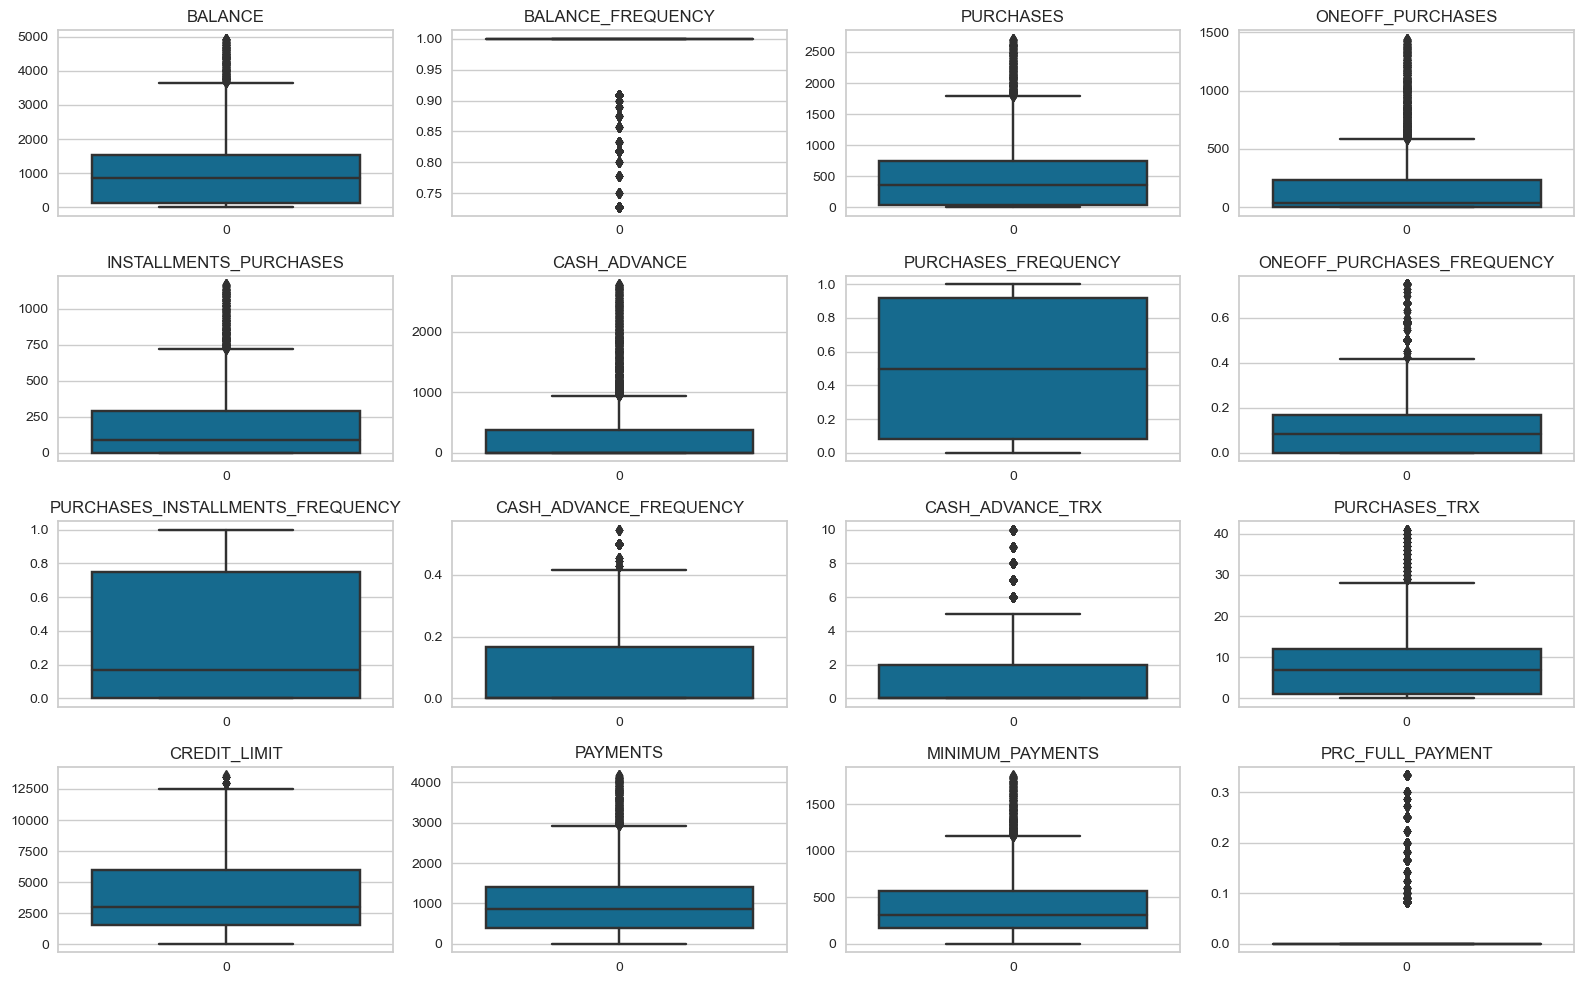

In [28]:
#checking outlier dengan boxplot 
fig, axes = plt.subplots(4, 4, figsize=(16, 10))

for i, col in enumerate(num_features):
    row_idx = i // 4 
    col_idx = i % 4 
    sns.boxplot(data=data_num[col], ax=axes[row_idx, col_idx]) 
    axes[row_idx, col_idx].set_title(col)  

plt.tight_layout()
plt.show()

## Handle missing values

Step selanjutnya kita coba melihat missing valuesnya.

In [29]:
#checking missing 
data_num.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

Ternyata ada 1 pada feature credit limit dan 313 pada minimum payment. Untuk mencari tahu apakah missing valuesnya MAR, MCAR, MNAR kita lanjutkan step berikutny

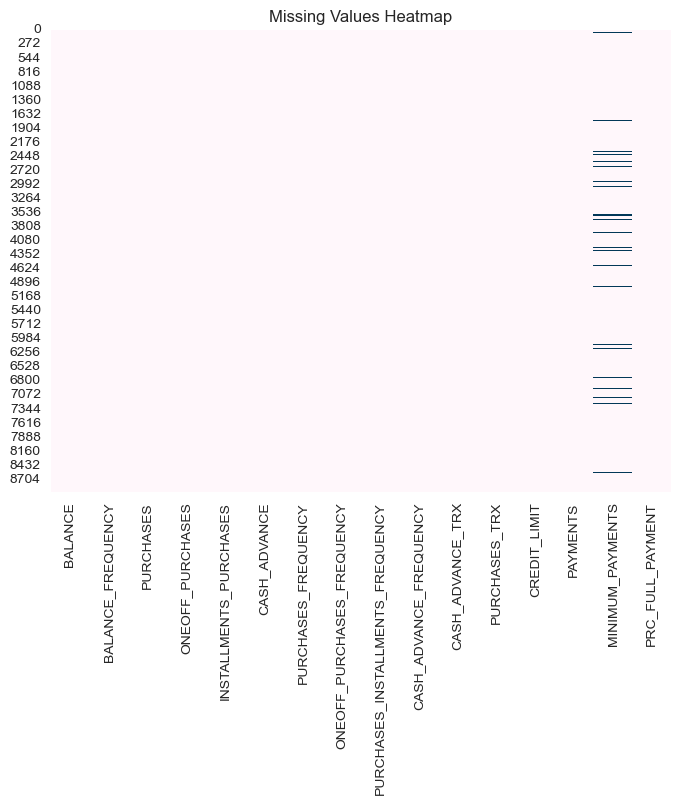

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_num.isnull(), cmap='PuBu', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

Dari heatmap diatas terlihat ada pattern yang menunjukkan missing value bukan hilang secara random

In [31]:
#checking missing value
null_data = data_num[data_num.isnull().any(axis=1)]

In [32]:
null_data[null_data['CREDIT_LIMIT'].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
7686,18.400472,1.0,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0


Dari penelusuran sepertinya, missing data credit limit mempunyai Balance, balance frequency yang sedikit. Dicoba penelusuran data dimana balance <50, untuk mengetahui apakah credit_limitnya lebih besar atau lebih kecil dari balanceny

In [33]:
data_num[data_num['BALANCE'] <50]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,16.581535,1.000000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000
2,1.979916,1.000000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000
3,3.833185,1.000000,45.00,45.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,500.0,0.000000,NaN,0.000000
9,0.000000,1.000000,176.03,176.03,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,7000.0,0.000000,NaN,0.000000
10,18.885677,1.000000,57.00,57.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8597,7.367128,1.000000,479.71,479.71,0.00,95.299613,0.333333,0.333333,0.000000,0.222222,2,12,3000.0,1190.039830,18.092319,0.000000
8652,30.287602,0.818182,0.00,0.00,0.00,827.814406,0.000000,0.000000,0.000000,0.416667,0,0,1000.0,963.269399,74.387702,0.166667
8709,15.523256,1.000000,0.00,0.00,0.00,357.184643,0.000000,0.000000,0.000000,0.416667,0,0,500.0,213.153735,70.797458,0.090909
8755,32.779456,1.000000,212.58,160.48,52.10,279.524631,0.500000,0.333333,0.166667,0.416667,5,8,1500.0,338.583630,115.811030,0.200000


Dari hasil yang ditunjukan oleh tabel, sepertinya tidak ada korelasi antara balance yang kecil, credit_limit. Namun dari hasil yang ditunjukkan tabel, nilai kemungkinan besar merupakan Missing not At Random. Kemudian kita coba lihat pada feature minimum payment

In [34]:
null_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,16.581535,1.0,200.00,0.00,200.0,0.000000,0.125,0.000,0.125,0.000000,0,2,1200.0,0.000000,NaN,0.0
2,1.979916,1.0,80.00,80.00,0.0,0.000000,0.125,0.125,0.000,0.000000,0,1,1500.0,0.000000,NaN,0.0
3,3.833185,1.0,45.00,45.00,0.0,0.000000,0.125,0.125,0.000,0.000000,0,1,500.0,0.000000,NaN,0.0
7,2730.843802,1.0,361.28,38.00,0.0,0.000000,0.125,0.125,0.000,0.000000,0,1,2900.0,0.000000,NaN,0.0
9,0.000000,1.0,176.03,176.03,0.0,0.000000,0.125,0.125,0.000,0.000000,0,1,7000.0,0.000000,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,0.000000,1.0,0.00,0.00,0.0,253.887233,0.000,0.000,0.000,0.111111,1,0,500.0,2437.932505,NaN,0.0
8564,8.187263,1.0,0.00,0.00,0.0,793.848237,0.000,0.000,0.000,0.111111,1,0,1350.0,0.000000,NaN,0.0
8568,25.998899,1.0,0.00,0.00,0.0,466.387778,0.000,0.000,0.000,0.111111,1,0,4000.0,0.000000,NaN,0.0
8570,116.172752,1.0,0.00,0.00,0.0,1867.994674,0.000,0.000,0.000,0.111111,6,0,3000.0,0.000000,NaN,0.0


In [35]:
#showing null unique
null_data.PAYMENTS.unique()

array([0.00000000e+00, 4.38738982e+02, 3.90543082e+03, 1.20697352e+02,
       3.68807294e+02, 1.29791835e+02, 2.75029692e+02, 1.01639354e+02,
       2.08949793e+02, 5.45756332e+02, 1.29905883e+02, 2.75861322e+02,
       1.52109132e+02, 1.27996550e+02, 3.17354396e+02, 3.63735397e+02,
       5.78819329e+02, 4.31443959e+02, 2.76242239e+02, 8.61744611e+02,
       2.82699746e+02, 1.98562574e+02, 3.82210790e+02, 5.56071033e+02,
       4.15603589e+02, 8.93429001e+02, 1.24992760e+02, 3.10575541e+02,
       4.98788091e+02, 5.57480712e+02, 3.92964337e+03, 7.18854870e+02,
       5.55764209e+02, 8.56901546e+02, 3.19172687e+02, 1.04200159e+03,
       6.97573197e+02, 9.57337010e+01, 1.65763083e+02, 1.40890144e+02,
       7.57505620e+01, 2.68521412e+02, 7.60989921e+02, 4.17016763e+02,
       2.95937124e+02, 6.41866089e+02, 1.81014541e+02, 3.11673478e+02,
       2.38958300e+00, 1.08183134e+03, 4.51681240e+01, 5.87612990e+01,
       2.21277150e+02, 6.92523718e+02, 1.15913506e+03, 5.35013917e+02,
      

In [36]:
#showing null unique
null_data.PRC_FULL_PAYMENT.unique()

array([0.])

Sepertinya dari penelusuran diatas, semua null_data pada feature PRC_FULL_PAYMENT mempunyai nilai 0. Artinya semua  pelanggan tersebut belum melakukan pembayaran penuh terhadap tagihan mereka dan mungkin melakukan pembayaran minimum atau pembayaran sebagian dari tagihan. Dapat disimpulkan feature MINIMUM_PAYMENTS  merupakan Missing not At Random. Sehingga dari feature feature tersebut bisa kita lakukan imputasi pada missing valuenya.             

Disini saya menggunakan KNNImputer untuk memberikan data yang lebih akurat dibandingkan mean ataupun median.

In [37]:
# Mengisi nilai yang hilang pada setiap fitur dengan metode KNN
imputer = KNNImputer()
data_imputed = imputer.fit_transform(data_num)
data_imputed = pd.DataFrame(data_imputed, columns=data_num.columns)

Karena kita tidak perlu lagi memisahkan feature numerical categorical , berserta tidak dilakukannya feature selection. Maka kita bisa lanjutkan kedalam feature scaling dan step lainnya

## Feature Scalling


Karena semua feature yang ada memiliki distribusi tidak normal, maka digunakan feature scalling MinMaxScaler

In [38]:
#scalling using minmax
scaler = MinMaxScaler()
scaler.fit(data_imputed)
data_imputed_t = scaler.transform(data_imputed)
data_imputed_t = pd.DataFrame(data_imputed_t, columns= num_features)

## PCA

Setelah dilakukan Feature Scaling maka dilanjutkan kedalam proses PCA. Proses PCA disini berfungsi untuk mereduksi dimensi feature yang terlalu besar. Selain itu juga digunakan agar dapat divisualisasikan hasil dari pendefinisian KMEANS

In [39]:
pca = PCA(n_components=2)
pca.fit_transform(data_imputed)
reduced_data = pca.fit_transform(data_imputed)
reduced_data= pd.DataFrame(reduced_data, columns= ['PC1','PC2'])
reduced_data.head(6)

,PC1,PC2
0,-3116.280006,-902.840647
1,-3184.221642,91.917299
2,-2825.524162,-949.270452
3,-3816.116119,-825.802886
4,-3220.449095,-431.320107
5,-2625.794521,60.033772


#  7-Model Definition

## K-MEANS

K-Means adalah algoritma klastering unsupervised yang digunakan untuk mengelompokkan data menjadi beberapa kelompok (klaster) berdasarkan kemiripan antara data. Tujuan utama K-Means adalah meminimalkan varians intra-klaster dan memaksimalkan varians antar-klaster. Proses K-Means melibatkan penempatan awal K pusat klaster secara acak, kemudian melakukan iterasi untuk mengoptimalkan posisi pusat klaster hingga konvergensi. Adapun kelebihan dan kelemahan dari algoritma ini antara lain :

- Algoritma klastering yang paling sederhana dan efisien. Itu dapat dengan cepat dan efisien menangani sejumlah besar data
- Mudah diterapkan pada dataset yang besar dan scalable
- Algoritma yang cepat konvergen

Adapun kekurangan dari KMEANS antara lain

- Hasil K-Means sangat bergantung pada jumlah klaster yang telah ditentukan sebelumnya (K)
- K-Means dapat berbeda tergantung pada posisi awal pusat klaster yang dipilih secara acak. Algoritma ini dapat terjebak pada optimum lokal jika posisi awal pusat klaster tidak baik
- K-Means dapat terpengaruh oleh perbedaan skala dalam atribut.

## Metrics

- Inertia: Inertia mengukur sejauh mana setiap titik data dalam klaster dekat dengan pusat klasternya sendiri. Semakin rendah nilai inertia, semakin kompak dan terpisah klaster tersebut.

- Silhouette Coefficient: Silhouette Coefficient mengukur seberapa baik setiap sampel ditempatkan dalam klasternya sendiri dibandingkan dengan klaster lain. Rentang nilai Silhouette Coefficient adalah -1 hingga 1, di mana nilai positif menunjukkan bahwa   sampel terletak dengan benar dalam klasternya, sedangkan nilai negatif menunjukkan bahwa sampel mungkin lebih cocok dalam klaster lain.
- Calinski-Harabasz Index (CH Index): CH Index adalah indeks yang digunakan untuk mengukur clustering dengan mempertimbangkan kepadatan dalam claster dan pemisahan antara claster. Semakin tinggi nilai CH Index, semakin baik clasternya. Nilai yang tinggi menunjukkan bahwa tiap clasternya kompak dan terpisah dengan baik.

- Davies-Bouldin Index: Metrics ini mengukur clustering dengan mempertimbangkan kepadatan dalam cluster dan pemisahan antara cluster. Semakin rendah nilai nya, semakin baik clusternya. 

- Elbow Method: Elbow Method adalah metode yang digunakan untuk menentukan jumlah optimal klaster dalam algoritma K-Means. Metode ini didasarkan pada evaluasi nilai inertia untuk berbagai jumlah klaster yang berbeda.


# 8 - Model Training

## Analyzing Best K for kmeans

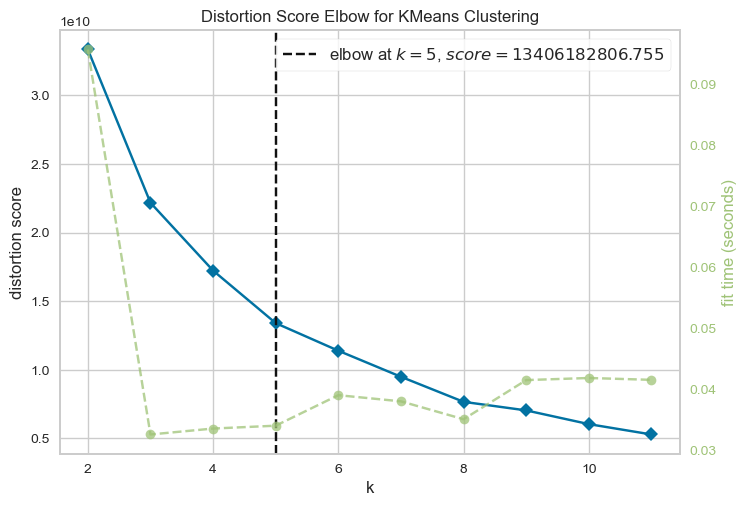

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
#plotting elbow for kmeans
model = KMeans(random_state=13, n_init = 'auto', max_iter = 100)
elb_visualizer = KElbowVisualizer(model, k=(2,12))
elb_visualizer.fit(reduced_data)    
elb_visualizer.show()  

Berdasarkan hasil distrosi elbow ternyata hasil clustering terbaik ada di k = 5.

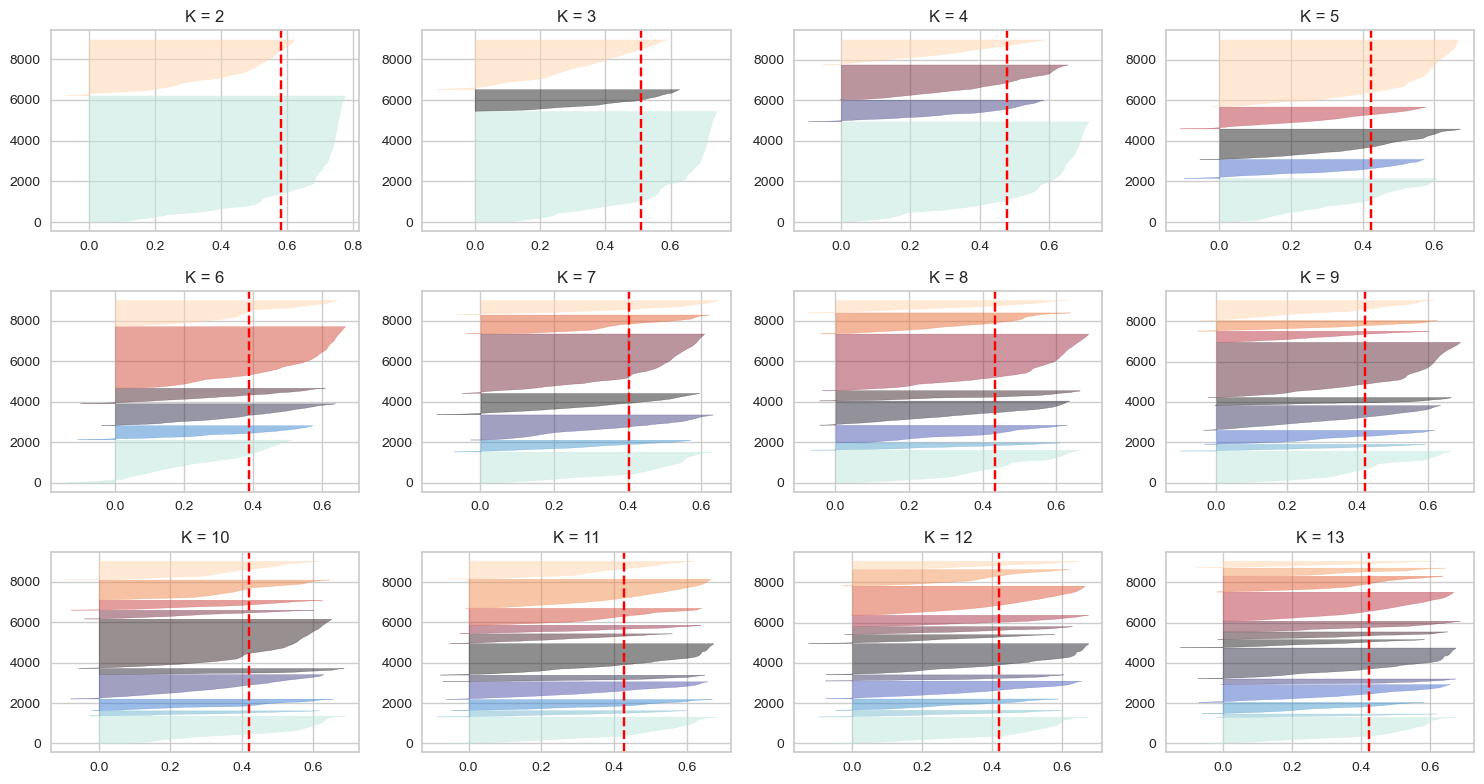

In [41]:
#setup clustering 
fig, axes = plt.subplots(3, 4, figsize=(15, 8))

for i, ax in enumerate(axes.flatten()):
    n_clusters = i + 2
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init="auto", max_iter = 100, random_state = 13)
    visualizer = SilhouetteVisualizer(kmeans, colors='icefire', ax=ax)
    visualizer.fit(reduced_data)
    ax.set_title(f'K = {n_clusters}')
plt.tight_layout()
plt.show()

Berdasarkan silhouete score ternyata k yang paling baik adalah k dengan nilai 2, namun perlu diperhatikan bahwa dalam penggunaannya didalam bisnis khususnya bank kita memerlukan cluster yang lebih banyak daripada 2. Sehingga kita mencoba melihat kembali silhoutte scoreny

In [42]:
#Checking silhouette_score
silhouette_scores = []
for i in range(2, 12):
    k_km = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init='auto', random_state=13)
    k_km.fit(reduced_data)
    score = silhouette_score(reduced_data, k_km.labels_, metric='euclidean')
    silhouette_scores.append(score)

scores_df = pd.DataFrame({'Number of Clusters': range(2, 12), 'Silhouette Score': silhouette_scores})
scores_df

,Number of Clusters,Silhouette Score
0,2,0.582668
1,3,0.508079
2,4,0.479001
3,5,0.424473
4,6,0.388274
5,7,0.403741
6,8,0.431936
7,9,0.421989
8,10,0.419202
9,11,0.426500


Memang berdasarkan sihouette score , cluster dengan jumlah 2 memiliki score yang paling baik diantara yang lain. Namun setelah diperhatikan perlu di analisis lebih lanjut untuk cluster 3 , 4, dan 8 dimana ke 3 cluster ini nilainya lebih tinggi. Karena dengan 2 cluster saja sepertinya tidak memungkinkan untuk menghasilkan kesimpulan yang baik bagi analisis ini.

In [43]:
#copy data
data_eva = reduced_data.copy()
final_data = reduced_data.copy()

## Initiate Parameter and Training

In [44]:
#inisiasi parameter kmeans
km_2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 100, n_init = 'auto', random_state = 13)
km_3 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 100, n_init = 'auto', random_state = 13)
km_4 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 100, n_init = 'auto', random_state = 13)
km_5 = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 100, n_init = 'auto', random_state = 13)
km_8 = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 100, n_init = 'auto', random_state = 13)

In [45]:
#training km tiap cluster yang dipilih
km_2.fit(data_eva)
km_3.fit(data_eva)
km_4.fit(data_eva)
km_5.fit(data_eva)
km_8.fit(data_eva)

KMeans(max_iter=100, n_init='auto', random_state=13)

# 9 - Model Evaluation


In [46]:
#predicting tiap cluster untuk masing masing k
cluster2 = km_2.predict(reduced_data)
cluster3 = km_3.predict(reduced_data)
cluster4 = km_4.predict(reduced_data)
cluster5 = km_5.predict(reduced_data)
cluster8 = km_8.predict(reduced_data)

In [51]:
#calculating every num cluster to metrics
scores = {}
db_scores = {}
s_scores = {}
ch_scores = {}

for i in [2, 3, 4, 5, 8]:
    # Calculate inertia score
    score = eval('km_' + str(i)).score(reduced_data)
    scores[i] = score
    

    db_index = round(davies_bouldin_score(reduced_data, eval('km_' + str(i)).labels_), 4)
    db_scores[i] = db_index
    

    s_score = round(silhouette_score(reduced_data, eval('km_' + str(i)).labels_), 4)
    s_scores[i] = s_score

    ch_index = round(calinski_harabasz_score(reduced_data, eval('km_' + str(i)).labels_), 4)
    ch_scores[i] = ch_index

inertia_score = pd.DataFrame.from_dict(scores, orient='index', columns=['Inertia Score'])
inertia_score.index.name = 'Number of Clusters'

db_index = pd.DataFrame.from_dict(db_scores, orient='index', columns=['Davies-Bouldin Index'])
db_index.index.name = 'Number of Clusters'

s_score = pd.DataFrame.from_dict(s_scores, orient='index', columns=['Silhouette Score'])
s_score.index.name = 'Number of Clusters'

ch_index = pd.DataFrame.from_dict(ch_scores, orient='index', columns=['Calinski-Harabasz Index'])
ch_index.index.name = 'Number of Clusters'

evaluation_metrics = pd.concat([inertia_score, db_index, s_score, ch_index], axis=1)
evaluation_metrics


,Inertia Score,Davies-Bouldin Index,Silhouette Score,Calinski-Harabasz Index
Number of Clusters,,,,
2,-3.335193e+10,0.6610,0.5827,16143.8321
3,-2.218171e+10,0.8058,0.5081,14388.3705
4,-1.723635e+10,0.8300,0.4790,13198.5040
5,-1.340744e+10,0.8339,0.4245,13364.3939
8,-7.670140e+09,0.7577,0.4319,14299.2427


Berdasarkan hasil hasil metrics, ditunjukkan pada cluster 8 memiliki nilai inertia yang paling kecil namun buruk di index DB dan silhouette score. Berdasrkan hasil elbow score k terbaik ada di k =5 , dimana dari tabel diatas mempunyai nilai inertia paling kecil kedua, dan index DB yang paling tinggi, meskipun nilai sillhouette, dan CH-Indexnya scorenya rendah. Dari kemungkinan yang ada antara cluster 2 ,3 ,4 ,5 ,8 cluster 2 dan 3 dikeluarkan dari opsi , dikarenakan hasil cluster akan terlalu general dan sulit untuk mengkarakteristikan profile dari customer. Dari asumsi dan analis berikut maka dipilih lah cluster 5 , dimana  DB Index, Elbow , dan inertia yang baik diantara semua cluster.

In [ ]:
Sebelum diputuskan k mana yang terbaik maka perlu dicoba untuk di evaluasi dari scatterplot

In [ ]:
#defining new_data_eva with clustering 
new_col = [cluster2, cluster3, cluster4, cluster5, cluster8 ]
new_data_eva = data_eva.copy()
new_data_eva['cluster2'] = cluster2
new_data_eva['cluster3'] = cluster3
new_data_eva['cluster4'] = cluster4
new_data_eva['cluster5'] = cluster5
new_data_eva['cluster8'] = cluster8

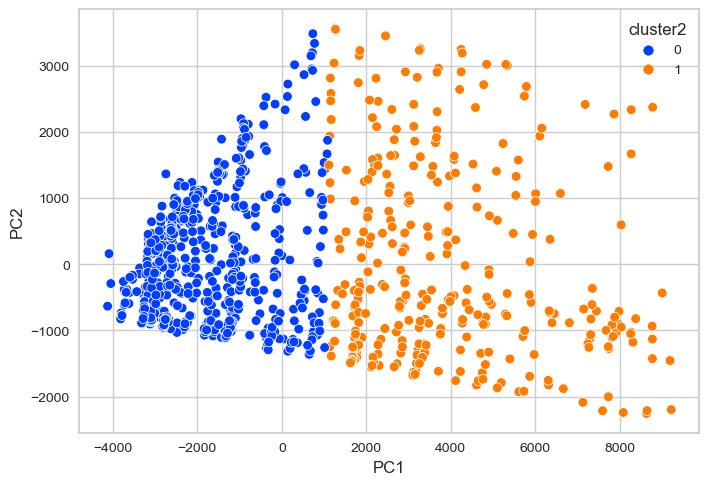

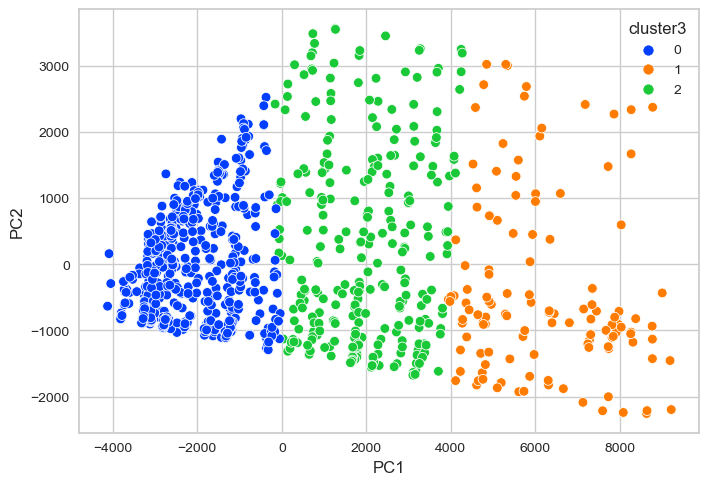

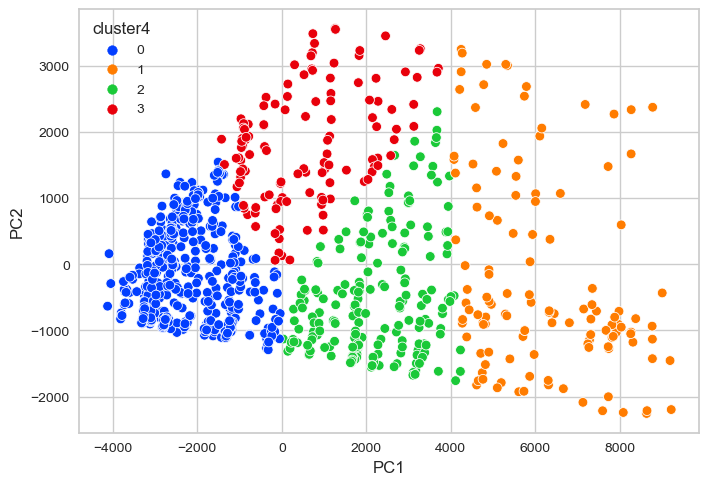

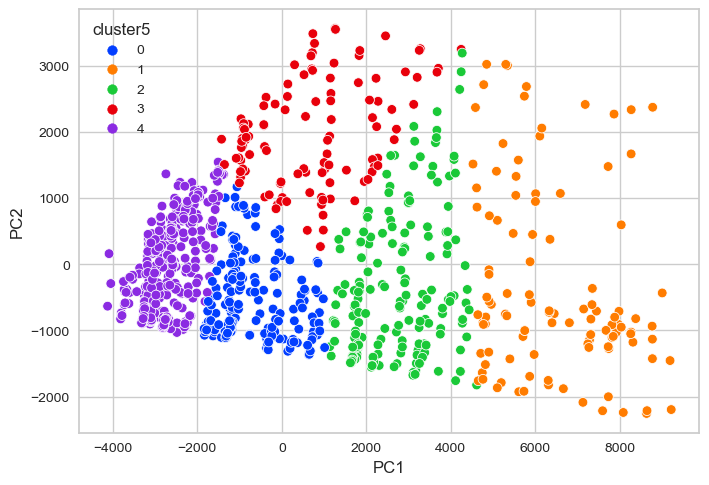

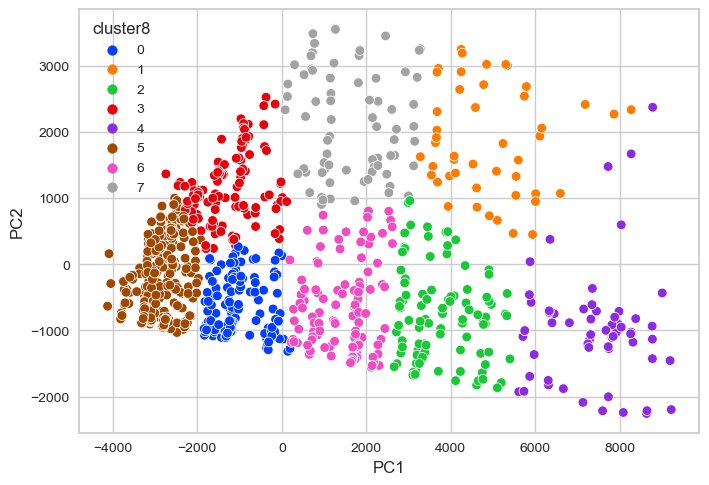

In [ ]:
#plotting scatter plot for every col
new_col = ['cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster8' ]
sampled_data = new_data_eva.sample(n=100, random_state=13)
for col in new_col :
    sns.scatterplot(data=new_data_eva.sample(n=1000, random_state=13), x="PC1", y="PC2", hue=col, palette="bright")
    plt.show()

Dari keseluruhan scatterplot terlihat scatter plot dengan jumlah 4, 5 yang paling baik. Sehingga secara keseluruhan baik itu DB Index, Elbow , dan inertia , nilai K=5 merupakan yang paling baik dari seluruhnya dan juga lebih cocok dalam pengclasifikasian dalam case kartu kredit ini.  Oleh sebab itu maka diputuskan k=5 untuk membuat clusternya

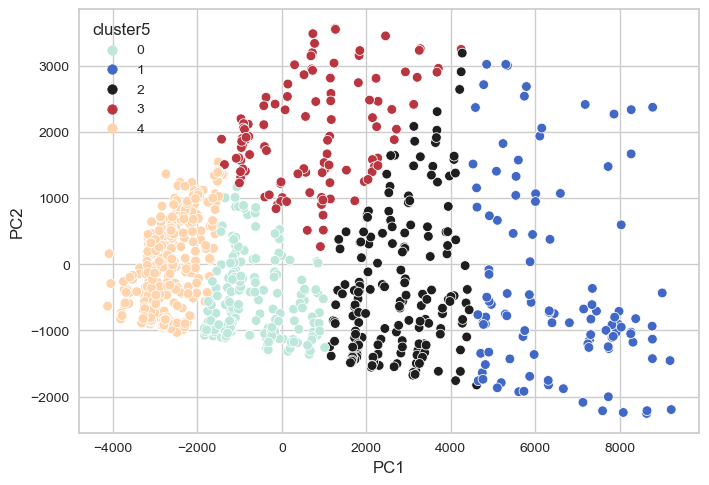

In [ ]:
#scatter for k=5
sns.scatterplot(data=new_data_eva.sample(n=1000, random_state=13), x="PC1", y="PC2", hue='cluster5', palette="icefire")
plt.show()

di cluster nomer 4 , kita dapat melihat renntang PC1 diantara -2000 dan -4000 dimana rentang PC2 diantara -1200 dan 1200
di cluster nomer 0 , kita dapat melihat rentang PC1 diantara 1000 dan -1000, dimana rentang PC2 diantara 1200 dann ~1400
di cluster nomer 3 , kita dapat melihat rentang PC1 diantara -2000 dan 4000, dimana rentang PC2 diantara ~3000 dan 500
di cluster nomer 2, kita dapat melihat rentang PC1 diantara ~1500 dan +-4000, dimana rentang PC2 diantara 3000 dan -2000
di cluster nomer 1, kita dapat melihat rentang PC1 diantara 4000 dan >8000 , dimana rentang PC2 diantara 3000 dan -2000
Namun hasil diatas masih sulit dianalis , dan perlu analisis lanjutan

## Analysis


In [ ]:
#membuat tabel mean for every cluster 
final_data = pd.concat([data_imputed, data_cat], axis=1)
final_data['cluster_result']=cluster5+1
final_data['cluster_result'] = 'Cluster '+final_data['cluster_result'].astype(str)
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = final_data.describe().loc[['mean']].T
df_cluster_summary = final_data.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile.style.background_gradient(cmap='PuBu').hide_index()

Column Name,Metrics,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Overall
BALANCE,mean,470.438885,1568.500687,976.395643,3052.076224,730.757073,1074.494260
BALANCE_FREQUENCY,mean,0.972006,0.983839,0.978193,0.987825,0.976783,0.977925
PURCHASES,mean,612.827306,635.083602,664.011619,467.524236,391.407630,524.578297
ONEOFF_PURCHASES,mean,207.334279,250.594753,265.310034,189.457076,142.098327,195.276109
INSTALLMENTS_PURCHASES,mean,226.966161,200.152387,206.969496,146.592784,171.273900,190.673724
CASH_ADVANCE,mean,215.531343,294.540402,269.829566,760.434462,361.576037,352.012004
PURCHASES_FREQUENCY,mean,0.554400,0.550730,0.553618,0.390877,0.435296,0.490351
ONEOFF_PURCHASES_FREQUENCY,mean,0.128768,0.174532,0.164671,0.132420,0.092395,0.126524
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.427525,0.385589,0.390037,0.277700,0.333918,0.364437
CASH_ADVANCE_FREQUENCY,mean,0.053935,0.109604,0.081501,0.178851,0.092385,0.093473


Berdasarkan hasil diatas dapat dilihat beberapa hal

Cluster 1: Cluster ini terdiri dari pelanggan dengan pembelian yang tinggi dan sering menggunakan pembayaran dengan cicilan. Mereka memiliki credit limit yang lumayan besar dan cenderung sering menambah saldo di akun mereka. Strategi yang baik untuk cluster ini adalah meningkatkan penawaran produk atau layanan dengan opsi pembayaran cicilan yang menarik, serta memberikan penawaran khusus atau program loyalitas untuk meningkatkan kepuasan pelanggan.

Cluster 2: Cluster ini terdiri dari pelanggan dengan balance yang relatif tinggi dan frekuensi pembelian yang tinggi. Mereka cenderung menggunakan pembayaran tunai daripada kredit. Strategi yang baik untuk cluster ini adalah memberikan penawaran khusus atau diskon untuk pembayaran tunai, serta meningkatkan program rewards untuk mendorong pelanggan melakukan pembelian lebih sering.

Cluster 3: Cluster ini terdiri dari pelanggan dengan balance dan credit limit yang sedang. Mereka memiliki tenure yang tinggi dan sering melakukan transaksi. Strategi yang baik untuk cluster ini adalah meningkatkan pengalaman pelanggan dengan memberikan layanan yang lebih baik, serta mengoptimalkan program reward untuk mempertahankan loyalitas pelanggan.

Cluster 4: Cluster ini terdiri dari pelanggan dengan balance tertinggi. Mereka cenderung membayar dengan cash dan jarang menggunakan kredit. Strategi yang baik untuk cluster ini adalah meningkatkan keamanan transaksi tunai dan menyediakan layanan perbankan digital yang memudahkan pelanggan untuk mengelola dan membayar saldo mereka.

Cluster 5: Cluster ini terdiri dari pelanggan dengan balance dan credit limit yang rendah. Mereka jarang melakukan pembelian dan sering membayar secara tunai. Strategi yang baik untuk cluster ini adalah memberikan penawaran khusus untuk mendorong pembelian, serta menyediakan opsi pembayaran yang fleksibel dan layanan keuangan yang memenuhi kebutuhan pelanggan dengan kredit terbatas.

# 10 - Model Saving


In [ ]:
#saving model
with open('list_num_features.txt', 'w') as file_a :
    json.dump(num_features, file_a)
with open('list_cat_features.txt', 'w') as file_b :
    json.dump(cat_features, file_b)
with open('model_scaler.pkl', 'wb') as file_c :
    pickle.dump(scaler, file_c)
with open('model_pca.pkl', 'wb') as file_d :
    pickle.dump(pca, file_d)
with open('model_kmeans5.pkl', 'wb') as file_i :
    pickle.dump(km_5, file_i)

# 11 - Model Inferencing

In [ ]:
#model inferencing
with open('list_num_features.txt', 'rb') as file_1 :
    list_num_features = json.load(file_1)
with open('list_cat_features.txt', 'rb') as file_2 :
    list_cat_features = json.load(file_2)
with open('model_scaler.pkl', 'rb') as file_3 :
    model_scaller = pickle.load(file_3)
with open('model_pca.pkl', 'rb') as file_4 :
    model_pca = pickle.load(file_4)
with open('model_kmeans5.pkl', 'rb') as file_7 :
    model_kmeans5 = pickle.load(file_7)

In [ ]:
new_data_1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3.833185,0.125000,45.00,45.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,500.0,0.000000,NaN,0.000000,8
4,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
8946,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
8947,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.000000,11
8948,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


In [ ]:
data_inf = { 
        'BALANCE' : 5333, 
        'BALANCE_FREQUENCY' : 0.75,
        'PURCHASES' : 2225, 
        'ONEOFF_PURCHASES' :0,
       'INSTALLMENTS_PURCHASES' : 1500, 
       'CASH_ADVANCE' :1000, 
       'PURCHASES_FREQUENCY' : 0.56,
       'ONEOFF_PURCHASES_FREQUENCY' : 0, 
       'PURCHASES_INSTALLMENTS_FREQUENCY' : 0.45,
       'CASH_ADVANCE_FREQUENCY' : 0.6, 
       'CASH_ADVANCE_TRX' : 2, 
       'PURCHASES_TRX': 5,
       'CREDIT_LIMIT' : 100000 , 
       'PAYMENTS' :2600, 
       'MINIMUM_PAYMENTS' : 2000, 
       'PRC_FULL_PAYMENT' : 0,
       'TENURE' : 12

}
data_inf = pd.DataFrame([data_inf])

In [ ]:
#splitting
data_inf_num = data_inf[list_num_features]
data_inf_cat = data_inf[list_cat_features]

In [ ]:
#scaling
data_inf_num = model_scaller.transform(data_inf_num)
data_inf_num_t = pd.DataFrame(data_inf_num, columns= num_features)

In [ ]:
#pca
red_data_inf_num_t = model_pca.transform(data_inf_num_t)
red_data_inf_num_t= pd.DataFrame(red_data_inf_num_t, columns= ['PC1','PC2'])

In [ ]:
predict_cluster = model_kmeans5.predict(red_data_inf_num_t)
print('Customer ini berada di cluster' , predict_cluster[0])

Customer ini berada di cluster 4


# 12 - Kesimpulan



Berdasarkan hasil analisis, hampir semua customer memiliki Tenure selama 12 bulan, dalam hal lain semakin tinggi nilai balance yang dimiliki customer, customer cenderung untuk membayar secara cash, tidak suka membayar dengan menyicil, frekuensi pembelian rendah, dan mempunyai limit yang tinggi. Berdasarkan hasil cluster yang didapatkan banyak kelompok kelompok dengan profil yang berbeda beda sehingga dibutuhkan pendekatan pemasaran yang perlu disesuaikan dan dianalisis lebih lanjut, contoh saja pada cluster 1 yang memiliki profil sering menggunakan pembayaran dengan cicilan, sehingga dapat dilakukan penawaran seperti 0% interest dan sebagainya. 

# Conceptual Problems

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

   Inertia pada algoritma K-Means adalah ukuran total variabilitas atau "penyebaran" data di dalam setiap kluster. Inertia dihitung sebagai jumlah kuadrat jarak antara setiap titik data dalam kluster dengan pusat kluster terdekat. Tujuan dari algoritma K-Means adalah untuk mengurangi inertia atau mengoptimalkan penyebaran data di dalam kluster. Semakin rendah inertia, semakin padat dan homogen kluster tersebut.

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !
   Elbow Method merupakan sebuah metode yang digunakan dalam algoritma K-Means untuk menentukan jumlah kluster yang optimal. Metode ini berdasarkan evaluasi nilai inertia pada berbagai jumlah kluster yang berbeda. 
   
   Alasan Penggunaanya : Grafik yang dihasilkan oleh Elbow Method memberikan visualisasi yang membantu dalam melihat variasi inertia untuk berbagai jumlah kluster. Hal ini dapat membantu dalam pemahaman dan eksplorasi data secara intuitif.

   Cara penggunaannya : dengan melihat dan mencari titik yang menyerupai bentuk siku yang tergambar dalam grafik, kemudian dari titik tersebut dapat dipilih jumlah cluster yang ada di titik sebagai jumlah kluster yang optimal

   Kelebihan Elbow Method : Metode ini memberikan gambaran visual yang jelas tentang variasi inertia untuk berbagai jumlah kluster. Metode ini juga relatif sederhana dan cepat dalam memberikan estimasi jumlah kluster yang optimal

   Kelemahan Elbow Method : Metode ini tergantung pada interpretasi subjektif dalam menentukan "siku" pada grafik inertia, sehingga hasilnya bisa menjadi ambigu jika tidak terdapat siku yang jelas. Selain itu, terkadang metode ini tidak memberikan hasil yang jelas dan membutuhkan penilaian yang subyektif.